# Z Peak Fitting

### Objective

 1. find normalization of Z peak for fake rate calculation
 1. estimate tail distribution





|          |  MET<25   |MET>25   |
|----------|-----------|-----------|
|pass eVeto|A          |Signal - invert $m(Z)$ cut     |
|fail eVeto|B          | D         |

### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20  (?? 15 in scheduler?)
- electron: tight, pT>10
- muon: tight, pT> 25

### Signal region cuts (e channel)

 - photon pT > 50
 - inverse Z mass cut (Width?)
 - photon passing electron veto (Pixel Seed?)
 

### MC samples:
- ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/
- DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/ 

[incomplete]

In [1]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


## Import Samples

In [2]:
 %run interactiveStackTree.py --baseDir /data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/ \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --quiet --jupyt 

Welcome to JupyROOT 6.10/05
-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
Sample GJets_HT-600ToInf              cross section : 93.380000 pb     N Events : 2463946  sample lumi : 26386.228314      Scale : 1.360558      
Sample WZ3LNLO                        cross section : 5.260000 pb      N Events : 8260201  sample lumi : 1570380.418251    Scale : 0.022861      
Sample WJetsToLNu_HT-800To1200        cross section : 7.484300 pb      N Events : 1544513  sample lumi : 206367.061716     Scale : 0.173962      
Sample WJetsToLNu_HT-600To800         cross section : 16.288000 pb     N Events : 3779141  sample lumi : 232019.953340     Scale : 0.154728      
Sample GJets_HT-100To200              cross section : 9226.000000 pb   N Events : 5131873  sample lumi : 556.240299        Scale : 64.540451     
Sample ResonanceMass2000              cross section : 0.000172 pb      N Events : 50000    sample lumi : 289872165.921251  Scale : 0.000124  

In [3]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
b4 = '&& ph_hasPixSeed[0]==1'

In [4]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)

## Fill histogram

In [5]:
samples.Draw("m_lep_ph",baseeta+a4,(50,0,200),{"xlabel":"m(e,#gamma)"});

Scale DYJetsToLL_M-50 by 4.211637
Scale Z+jets by 1.000000
Scale ZGTo2LG by 0.453931
Scale Zgamma by 1.000000
Scale WGToLNuG-amcatnloFXFXPhCut by 9.118271
Scale WGToLNuG_PtG-130-amcatnloFXFXPhCut by 0.086360
Scale WGToLNuG_PtG-500-amcatnloFXFXPhCut by 0.000768
Scale Wgamma by 1.000000
Scale WJetsToLNuTrueHTOlap by 74.356267
Scale WJetsToLNu_HT-100To200 by 4.648495
Scale WJetsToLNu_HT-200To400 by 3.102034
Scale WJetsToLNu_HT-400To600 by 1.167635
Scale WJetsToLNu_HT-600To800 by 0.154728
Scale WJetsToLNu_HT-800To1200 by 0.173962
Scale WJetsToLNu_HT-1200To2500 by 0.263335
Scale WJetsToLNu_HT-2500ToInf by 0.005717
Scale Wjets by 1.000000
Scale TTGJets by 0.084117
Scale TTG by 1.000000
Scale GJets_HT-100To200 by 64.540451
Scale GJets_HT-200To400 by 8.226982
Scale GJets_HT-400To600 by 3.936651
Scale GJets_HT-40To100 by 166.564346
Scale GJets_HT-600ToInf by 1.360558
Scale GJets by 1.000000
Scale DiPhoton by 0.155356
Scale GammaGamma by 1.000000
Scale TTJets_DiLept by 0.504680
Scale TTbar_DiLep

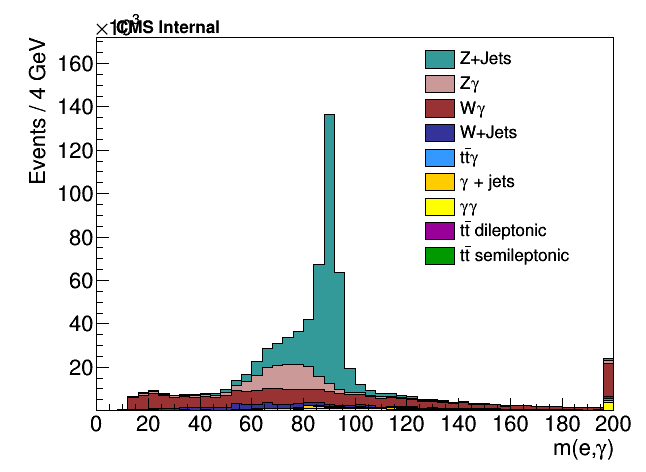

Info in <TCanvas::Print>: png file /tmp/tmpM36A5G.png has been created


In [6]:
samples.curr_canvases["top"]

In [7]:
h1 = samples.get_stack_aggregate()
h1.Draw()

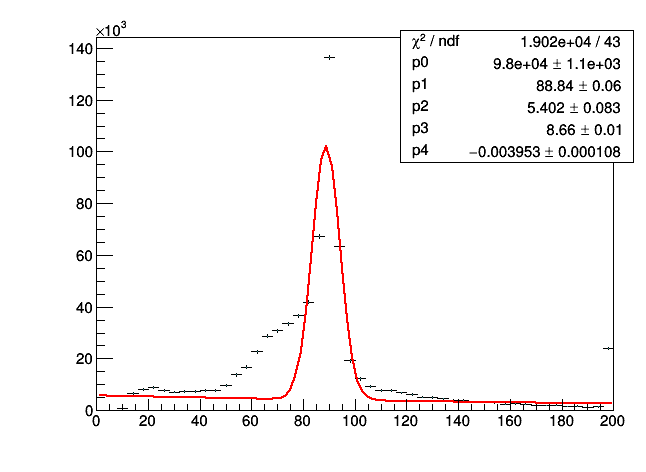

 FCN=19021.5 FROM MIGRAD    STATUS=CONVERGED     340 CALLS         341 TOTAL
                     EDM=9.26776e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.80048e+04   1.09734e+03   3.11878e+01   1.72123e-06
   2  p1           8.88401e+01   5.82463e-02   2.04884e-03  -2.26024e-02
   3  p2           5.40206e+00   8.26263e-02   1.85713e-03   1.14999e-02
   4  p3           8.65980e+00   1.44104e-02   5.99215e-04   1.57479e-02
   5  p4          -3.95267e-03   1.07747e-04   4.60388e-06   8.10834e+00


Info in <TCanvas::Print>: png file /tmp/tmpvYuiTW.png has been created


In [8]:
f1 = ROOT.TF1("f1","gaus(0)+expo(3)",0,200)
f1.SetParameter(0,1e3)
f1.SetParameter(1,90)
f1.SetParameter(2,10)
h1.Fit("f1")
samples.curr_canvases["top"]

In [9]:
samples.deactivate_sample("Zgamma")

Deactivate sample Zgamma


removing sample __AllStack__
Scale DYJetsToLL_M-50 by 4.211637
Scale Z+jets by 1.000000
Scale WGToLNuG-amcatnloFXFXPhCut by 9.118271
Scale WGToLNuG_PtG-130-amcatnloFXFXPhCut by 0.086360
Scale WGToLNuG_PtG-500-amcatnloFXFXPhCut by 0.000768
Scale Wgamma by 1.000000
Scale WJetsToLNuTrueHTOlap by 74.356267
Scale WJetsToLNu_HT-100To200 by 4.648495
Scale WJetsToLNu_HT-200To400 by 3.102034
Scale WJetsToLNu_HT-400To600 by 1.167635
Scale WJetsToLNu_HT-600To800 by 0.154728
Scale WJetsToLNu_HT-800To1200 by 0.173962
Scale WJetsToLNu_HT-1200To2500 by 0.263335
Scale WJetsToLNu_HT-2500ToInf by 0.005717
Scale Wjets by 1.000000
Scale TTGJets by 0.084117
Scale TTG by 1.000000
Scale GJets_HT-100To200 by 64.540451
Scale GJets_HT-200To400 by 8.226982
Scale GJets_HT-400To600 by 3.936651
Scale GJets_HT-40To100 by 166.564346
Scale GJets_HT-600ToInf by 1.360558
Scale GJets by 1.000000
Scale DiPhoton by 0.155356
Scale GammaGamma by 1.000000
Scale TTJets_DiLept by 0.504680
Scale TTbar_DiLep by 1.000000
Scale TTJ

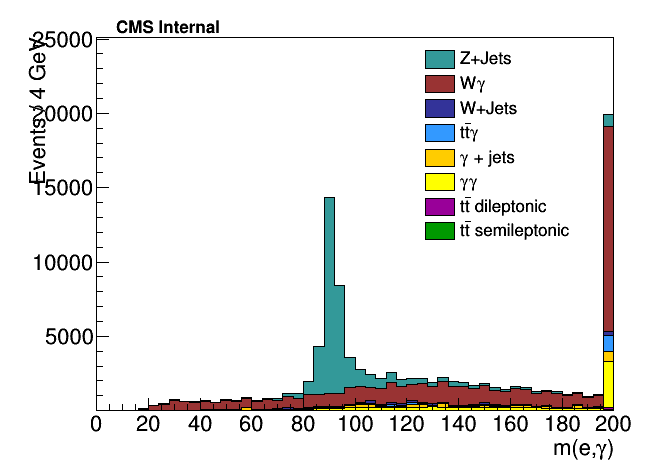

Info in <TCanvas::Print>: png file /tmp/tmpCneBJY.png has been created


In [10]:
samples.Draw("m_lep_ph",baseeta+a4+'&&ph_pt[0]>50',(50,0,200),{"xlabel":"m(e,#gamma)"})
samples.curr_canvases["top"]

### What I did below
 - took out Zgamma (a major nuisance)
 - selecting photon pt > 40 (less bremsstrahlung events)
 - fit limit (only taking account of background > Z mass)

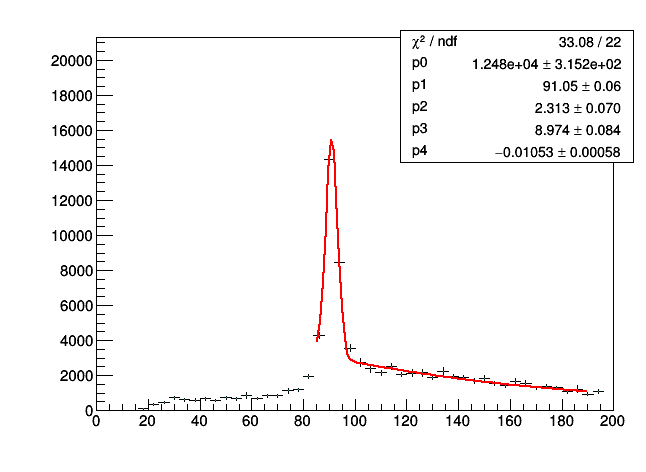

 FCN=33.0845 FROM MIGRAD    STATUS=CONVERGED     305 CALLS         306 TOTAL
                     EDM=2.69911e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.24834e+04   3.15234e+02   7.23578e-02  -4.07786e-07
   2  p1           9.10520e+01   6.12723e-02   1.01031e-04   1.51952e-03
   3  p2           2.31275e+00   7.01090e-02  -1.59473e-05   1.49368e-03
   4  p3           8.97365e+00   8.38460e-02   3.07107e-05  -9.82910e-03
   5  p4          -1.05253e-02   5.82832e-04  -1.13878e-07  -1.77819e+00


Info in <TCanvas::Print>: png file /tmp/tmp1lqpPe.png has been created


In [11]:
h1 = samples.get_stack_aggregate()
h1.Draw()

f2 = ROOT.TF1("f2","gaus(0)+expo(3)",0,200)
f2.SetParameter(0,1e3)
f2.SetParameter(1,90)
f2.SetParameter(2,10)
h1.Fit("f2","","",85,190)
samples.curr_canvases["top"]

In [12]:
parm = array('d',[0]*5)
f2.GetParameters(parm)
f2a =  ROOT.TF1("f2a","gaus",20,180)
f2a.SetParameters(parm)
samples.deactivate_all_samples()
samples.activate_sample("Z+jets")

Activate sample Z+jets


removing sample __AllStack__
Scale DYJetsToLL_M-50 by 4.211637
Scale Z+jets by 1.000000
Scale __AllStack__ by 1.000000
********************NOT FILLING SIGNAL ENTRY IN LEGEND**********************
{'name': ['Data'], 'isActive': True}
0.04


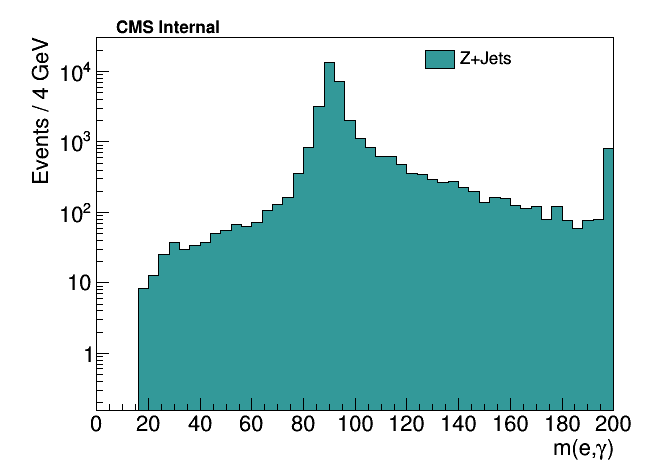

Info in <TCanvas::Print>: png file /tmp/tmpJiiUQC.png has been created


In [13]:
samples.Draw("m_lep_ph",baseeta+a4+'&&ph_pt[0]>50',(50,0,200),{"logy":1,"xlabel":"m(e,#gamma)"})
samples.curr_canvases["top"]

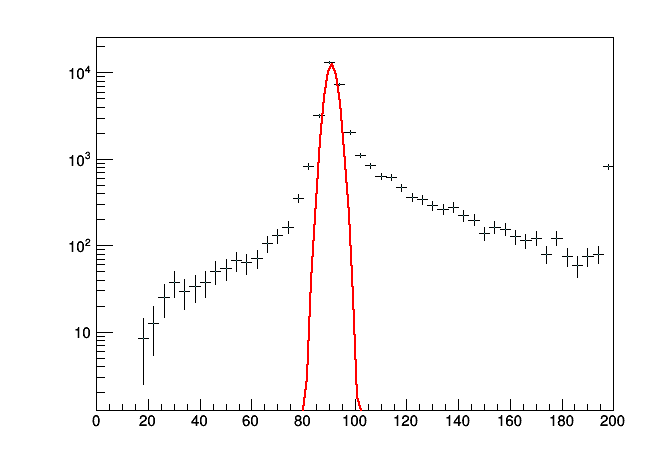

Info in <TCanvas::Print>: png file /tmp/tmp1GTVnd.png has been created


In [14]:
h_z = samples.get_stack_aggregate()
h_z.Draw()
f2a.Draw("same")
samples.curr_canvases["top"]

In [ ]:
print "fit normalization: ", f2a.Integral(80,100)
print "MC  normalization: ", h_z.Integral(20,25)*4

fit normalization:  72364.8436163
MC  normalization:  107767.376555


## next:

 - we obtain good normalization but the gaussian shape makes for a bad fit, especially on the tail
 - improving the fitter
     - fit background with generic function
     - possibility to use template for fitting Zgamma contribution
 - incorporate the fitter into fake rate code

### Using control region with failing eVeto
 - we could apply the fake rate on the shape region without regards to Z+jets contribution
 - there is no need to fit the tail there, so the above will apply only to region A,B where we measure fake rate
 - **Problem**: combinatorics for events with more than one photon
 - **Problem**: estimate the portion of photon objects that are in fact jet fakes

Kak Wong, 2018-09-13




### BACKUP



In [ ]:
f3a =  ROOT.TF1("f3a","[0]*exp(-0.5*((x-[1])/[2])^2)",20,180)
f3b =  ROOT.TF1("f3b","exp([0]+[1]*x)",20,180)
f3 = ROOT.TF1("f3","f3a+f3b",20,180)
f3.SetParameter(0,1e3)
f3.SetParameter(1,90)
f3.SetParameter(2,10)
h1.Draw()
h1.Fit("f3","","",80,180)
samples.curr_canvases["top"]
